In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [3]:

df = pd.read_csv('../../../datasets/concrete_data.csv')

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
x = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
lr = LinearRegression()
lr.fit(x_train , y_train)

y_pred = lr.predict(x_test)
print('R^2: ', r2_score(y_test , y_pred))

print(np.mean(cross_val_score(lr , x ,y , scoring='r2' ,  cv = 6)))

R^2:  0.6275531792314848
0.3898511787792436


0.4933427895506798
0.8020652798459413
0.566037768451274
0.09197296622154835
0.8977497365892823
-0.04148492160584416
-0.23998791417921328
3.335411210082252


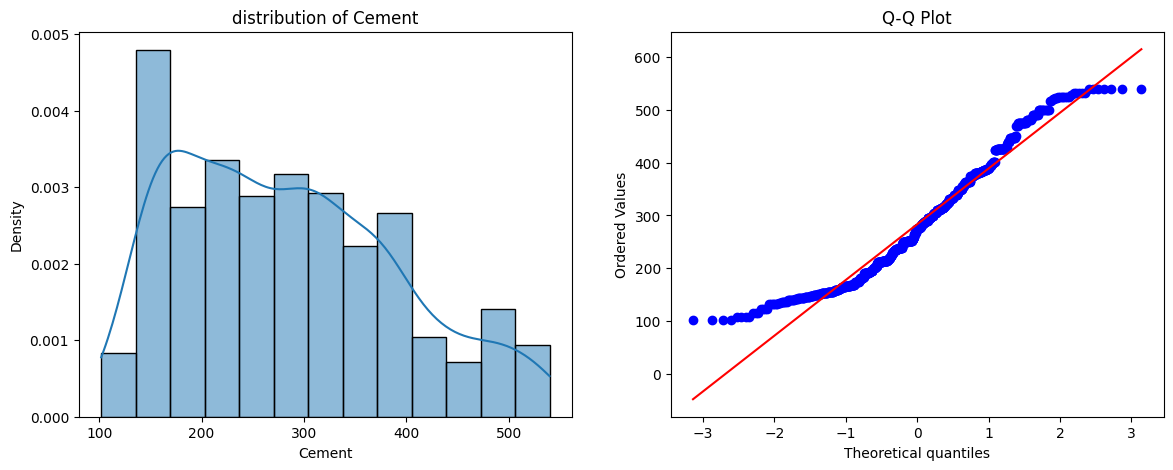

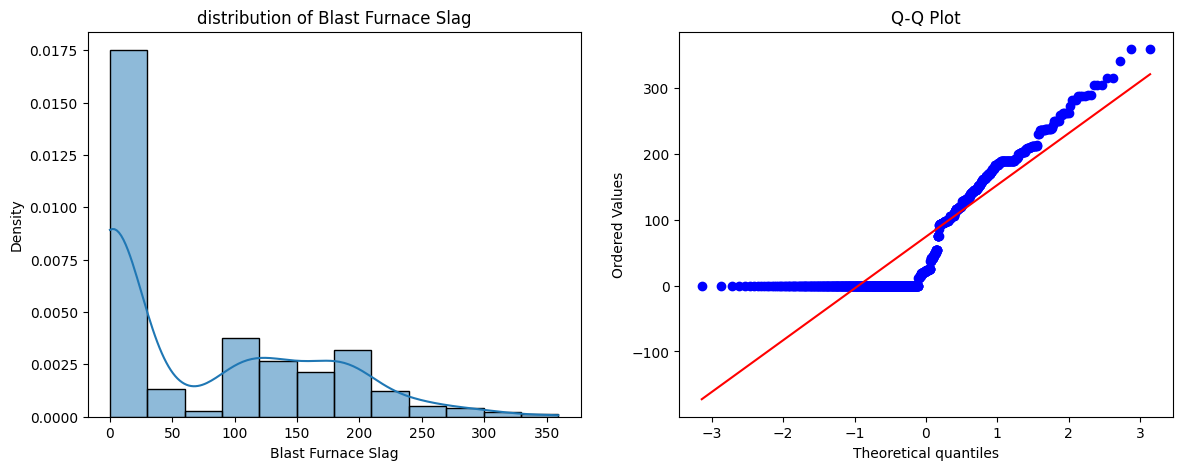

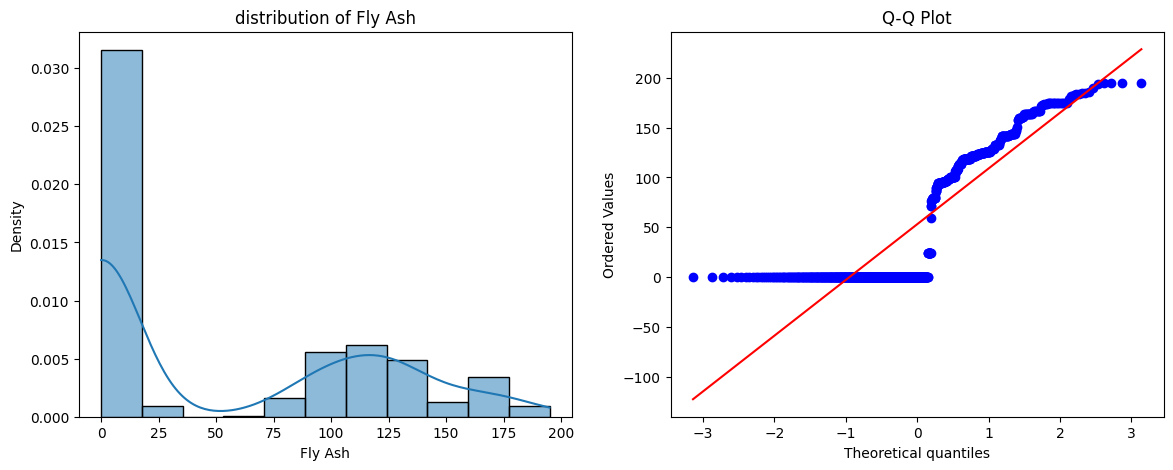

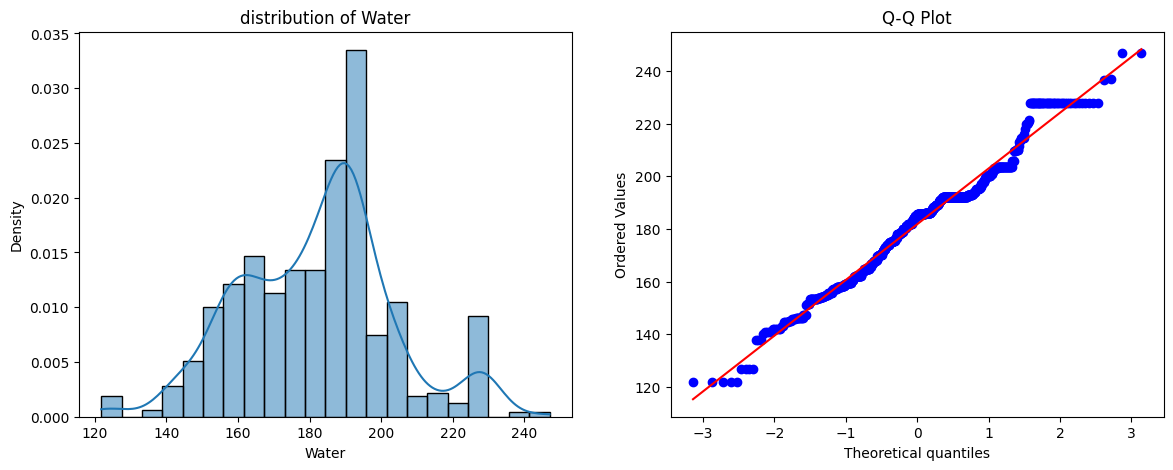

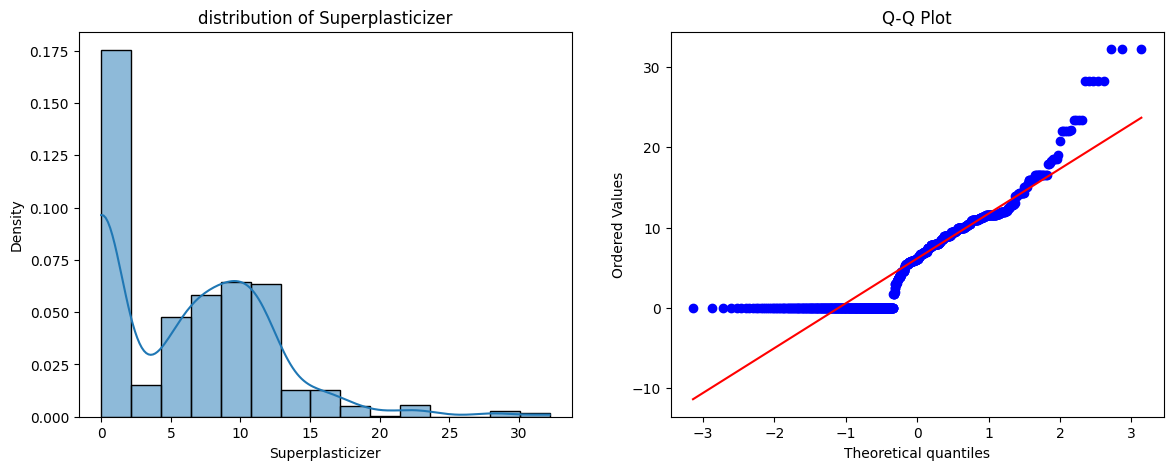

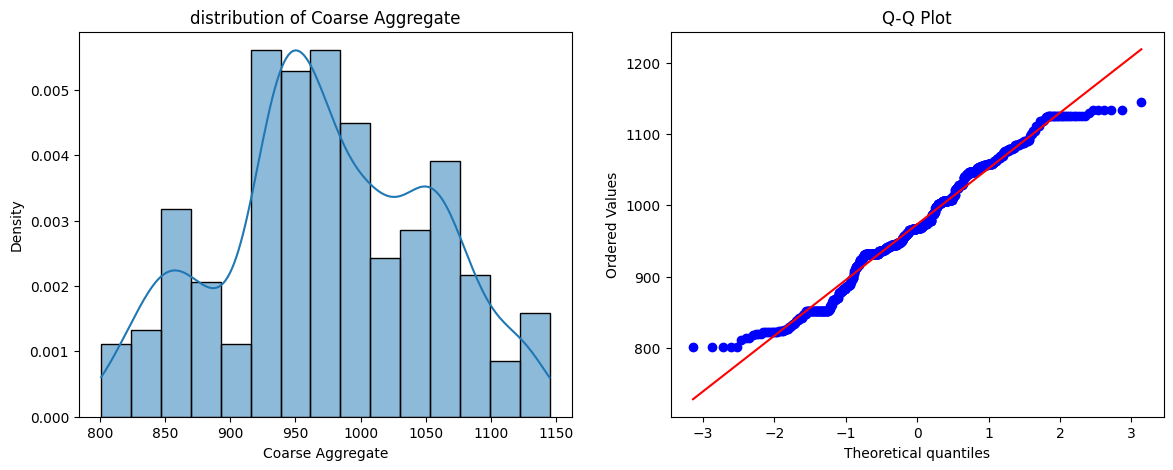

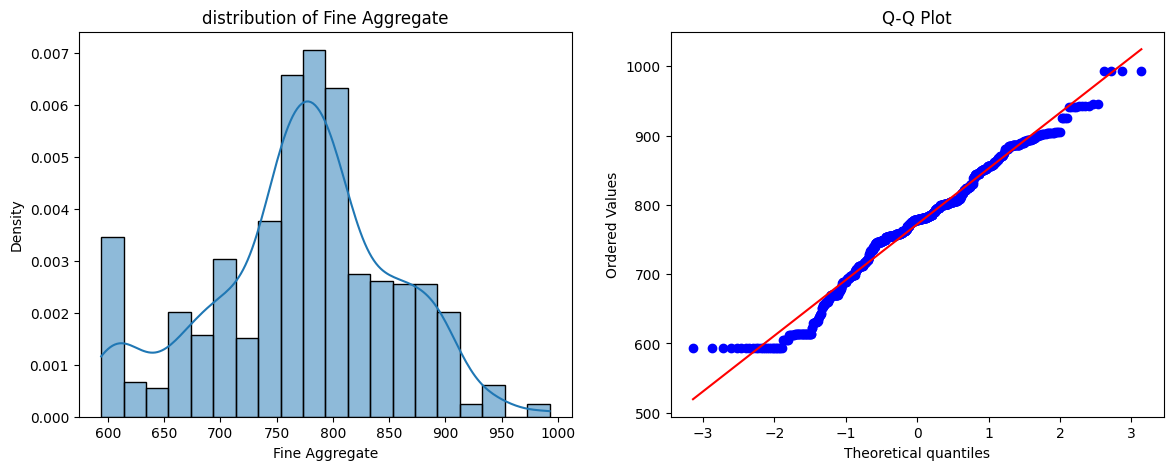

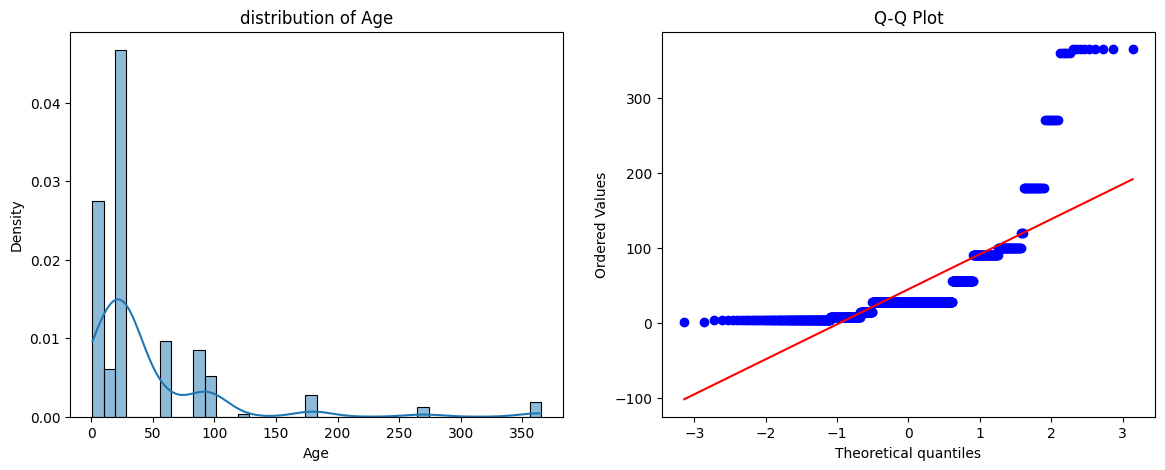

In [10]:
for col in x_train.columns : 
    fig , (ax1 , ax2) = plt.subplots(1 ,2 , figsize = (14,5))
    sns.histplot(x_train[col] , stat = 'density' , kde= True ,   ax = ax1) 
    ax1.set_title("distribution of " + col)

    stats.probplot(x_train[col] , dist = 'norm' , plot = ax2)
    ax2.set_title('Q-Q Plot')

    print(x_train[col].skew())

In [11]:
# Yeo-Johnson transfor 

pt1 = PowerTransformer()
x_train_transformed = pt1.fit_transform(x_train)
x_test_transformed = pt1.fit_transform(x_test)

lr = LinearRegression()
lr.fit(x_train_transformed , y_train)

y_pred = lr.predict(x_test_transformed )
print(r2_score(y_test , y_pred))

pd.DataFrame({'cols':x_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.8153845514638945


,cols,Yeo_Johnson_lambdas
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


In [12]:
# cross val score 
pt = PowerTransformer()
x_transformed2 = pt.fit_transform(x)

lr = LinearRegression()
np.mean(cross_val_score(lr ,  x_transformed2 , y ,  scoring = 'r2' , cv =5 ))*100

np.float64(68.34625141500864)

In [13]:
x_train_transformed = pd.DataFrame(x_train_transformed , columns = x_train.columns)

-0.020780116276636597
-0.02369901362471752
0.25489057753638505
0.004821349350404734
-0.15509040628089207
-0.020062191119625542
-0.013912030033173008
-0.0023472679276299187


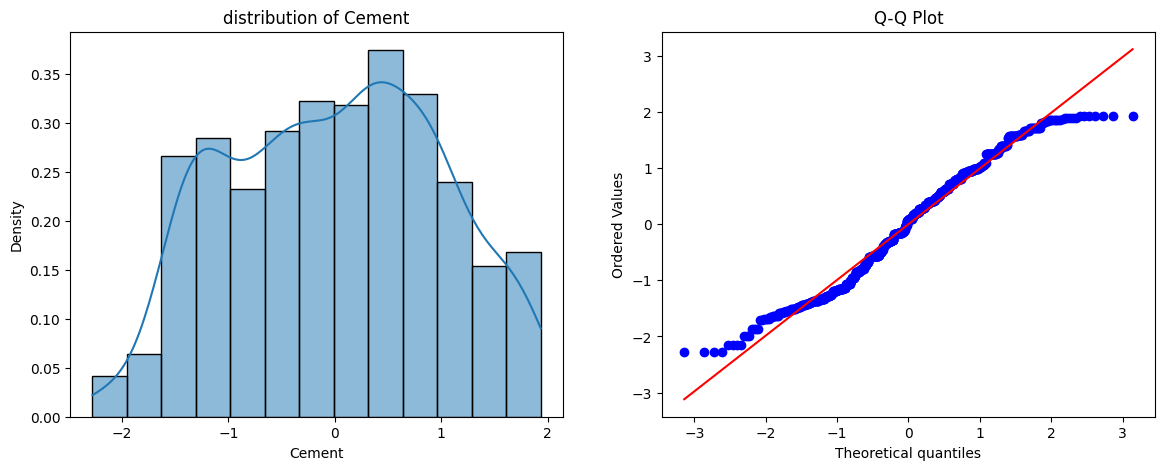

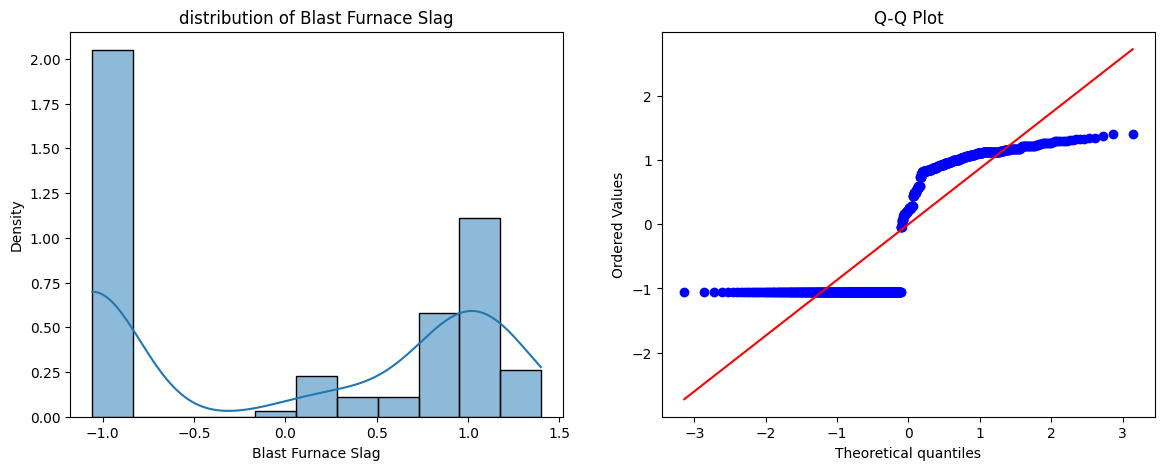

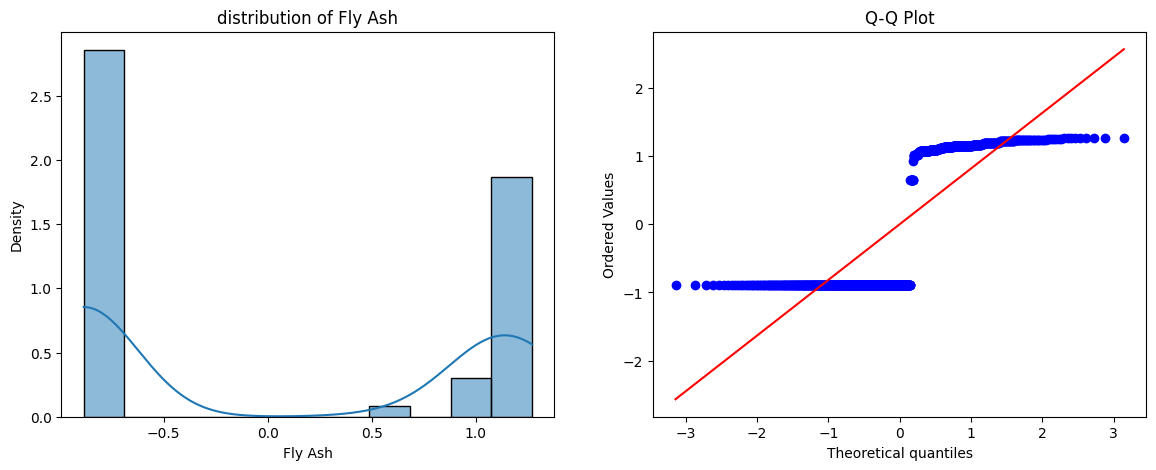

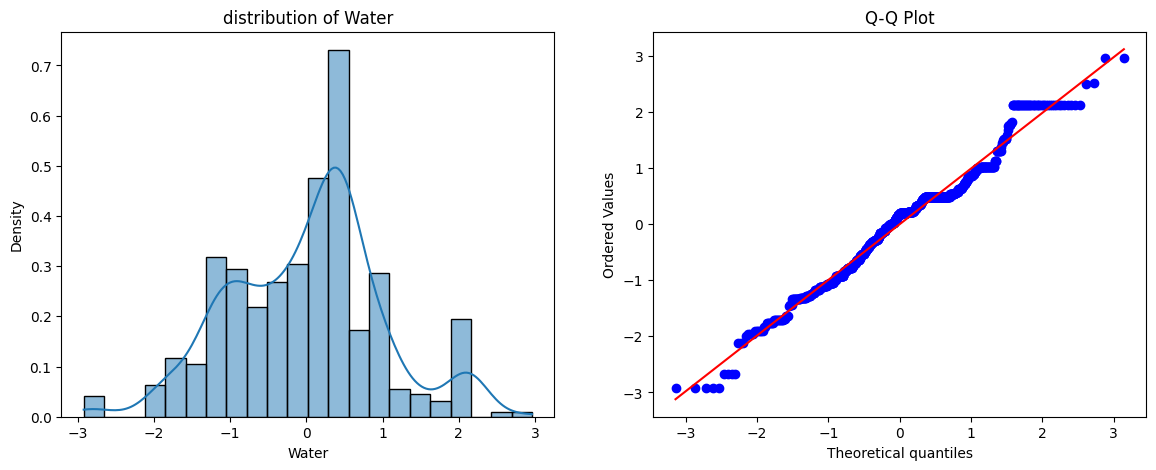

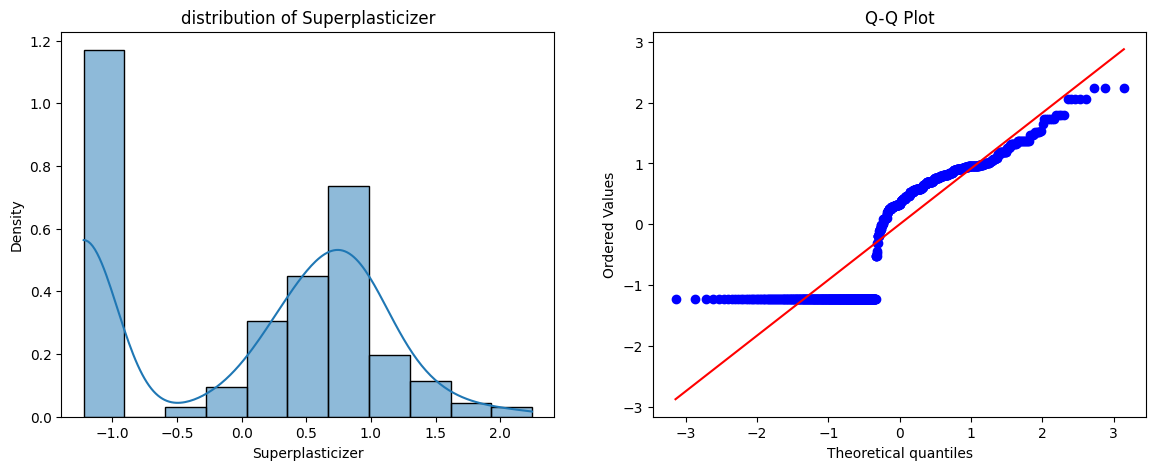

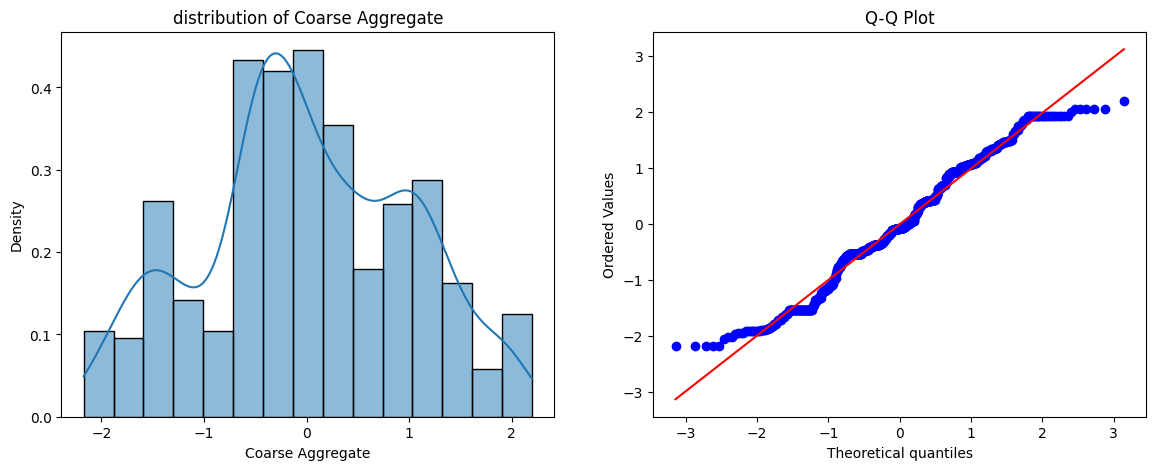

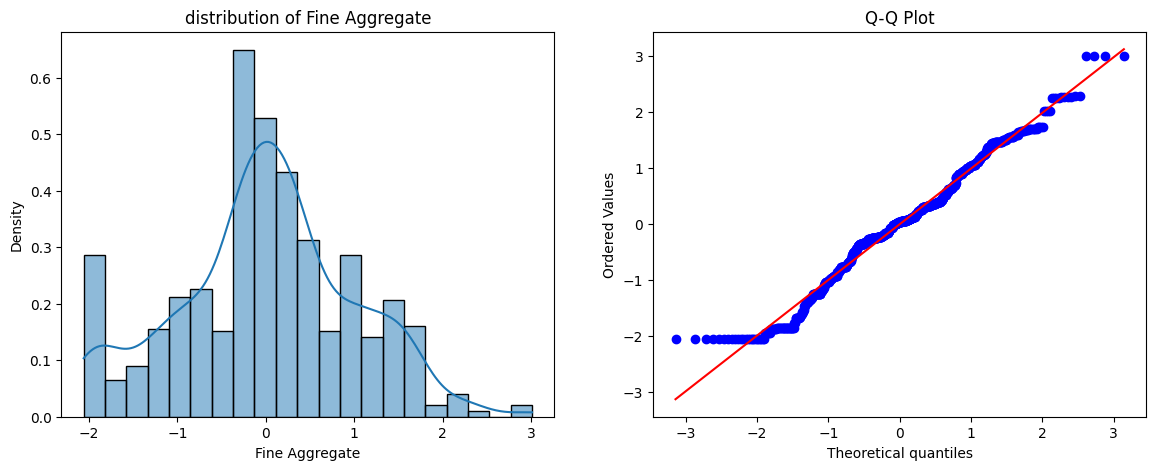

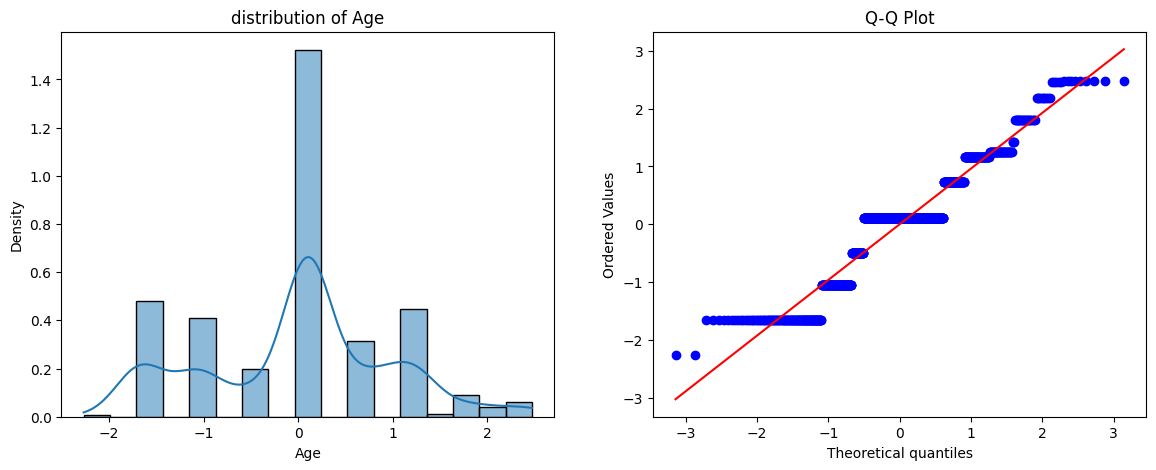

In [14]:
for col in x_train_transformed.columns : 
    fig , (ax1 , ax2) = plt.subplots(1 ,2 , figsize = (14,5))
    sns.histplot(x_train_transformed[col] , stat = 'density' , kde= True ,   ax = ax1) 
    ax1.set_title("distribution of " + col)

    stats.probplot(x_train_transformed[col] , dist = 'norm' , plot = ax2)
    ax2.set_title('Q-Q Plot')

    print(x_train_transformed[col].skew())

In [15]:
# yeo-johnson works better than box-cox , by default it is ye--johnson , we can also use box-cox 

In [16]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [22]:
pt = PowerTransformer()
x_transformed  = pt.fit_transform(x)
x_transformed = pd.DataFrame(x_transformed , columns = x.columns)


In [27]:
x_transformed

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,1.994342,-1.057530,-0.902763,-0.914487,-0.327700,0.862160,-1.208485,0.111732
1,1.994342,-1.057530,-0.902763,-0.914487,-0.327700,1.057114,-1.208485,0.111732
2,0.607415,1.001476,-0.902763,2.136453,-1.225815,-0.530500,-2.085749,2.129725
3,0.607415,1.001476,-0.902763,2.136453,-1.225815,-0.530500,-2.085749,2.401692
4,-0.744998,0.969970,-0.902763,0.496978,-1.225815,0.065405,0.629012,2.389241
...,...,...,...,...,...,...,...,...
1025,0.108575,0.913437,1.032900,-0.080927,0.679902,-1.319486,-0.109853,0.111732
1026,0.521344,-1.057530,1.107519,0.681864,0.839200,-1.979236,0.469048,0.111732
1027,-1.456225,0.992044,1.088866,0.529385,0.327196,-1.036057,0.037694,0.111732
1028,-1.290790,1.117718,-0.902763,-0.268951,0.927490,0.209799,0.151168,0.111732


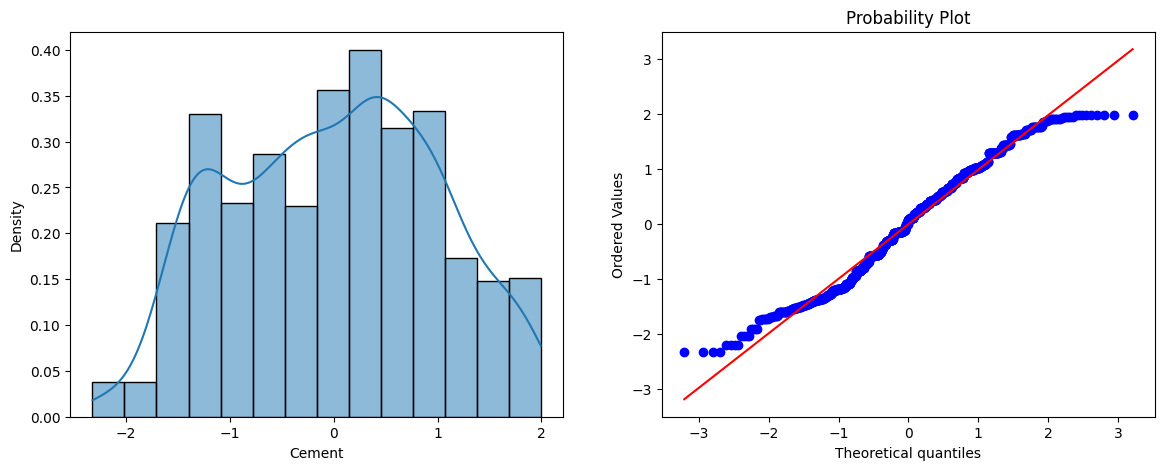

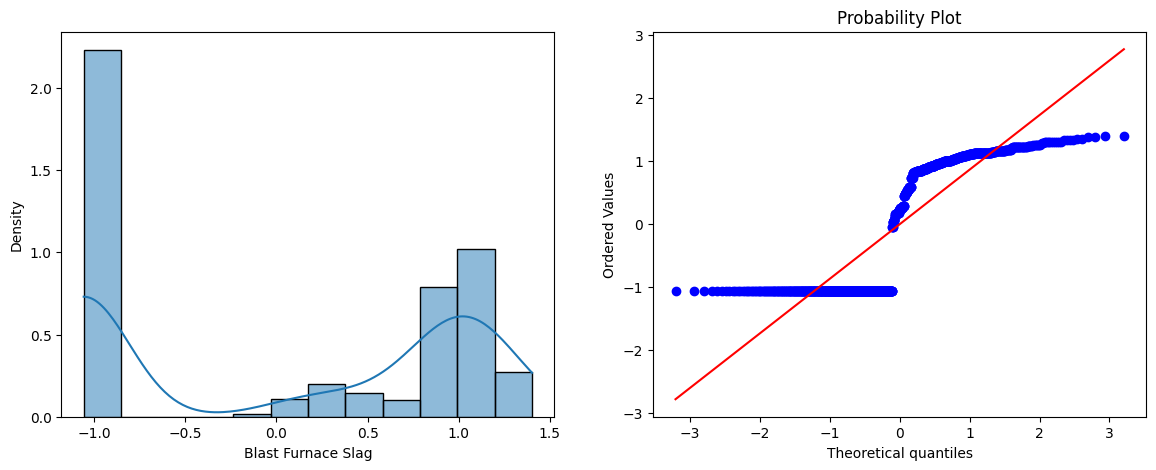

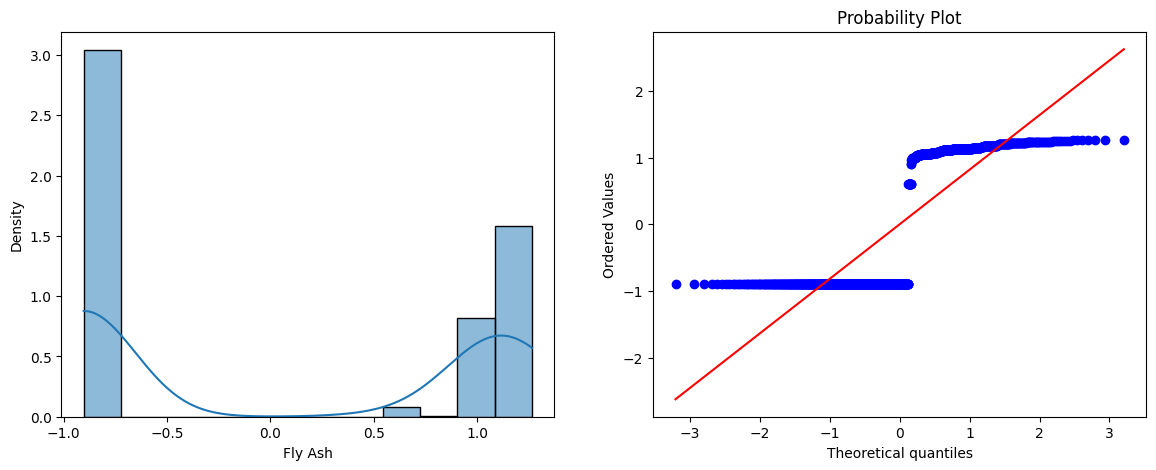

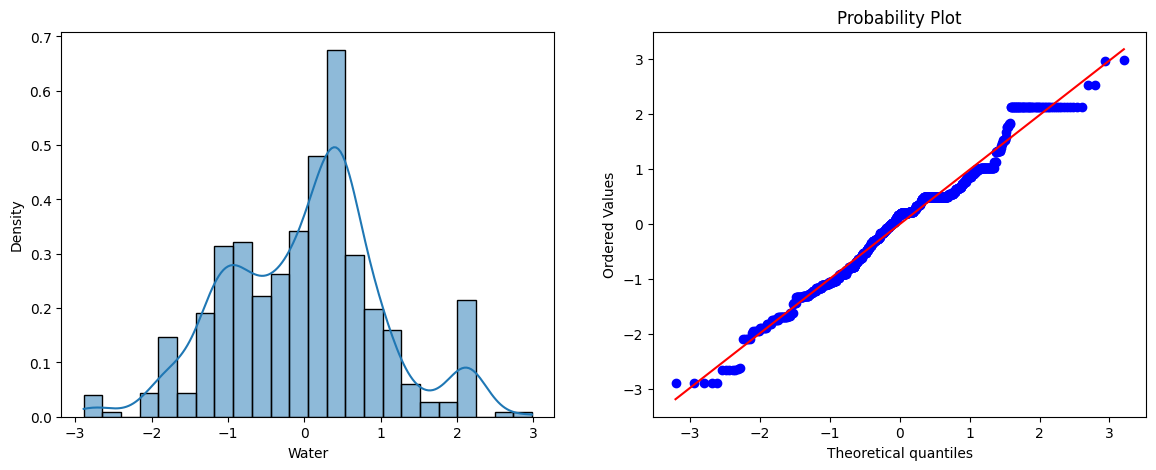

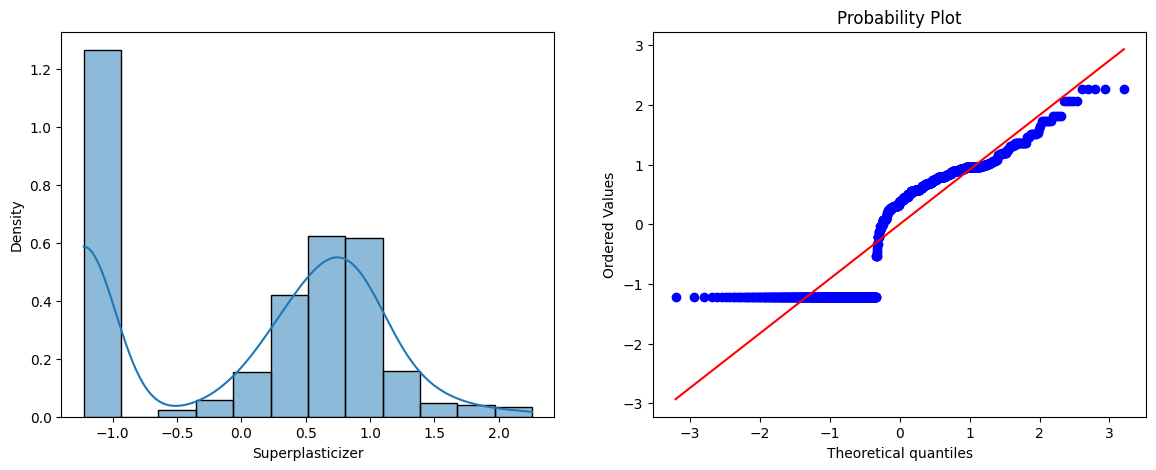

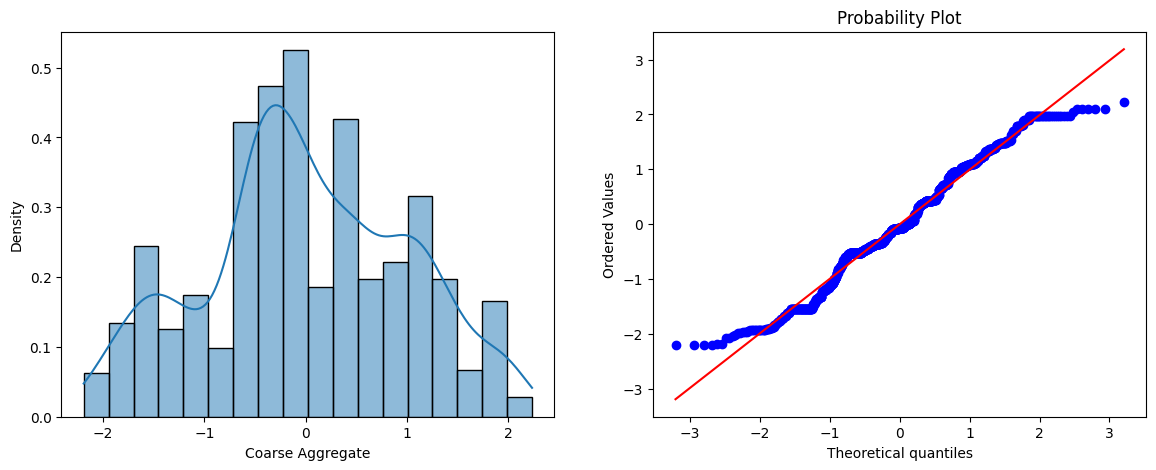

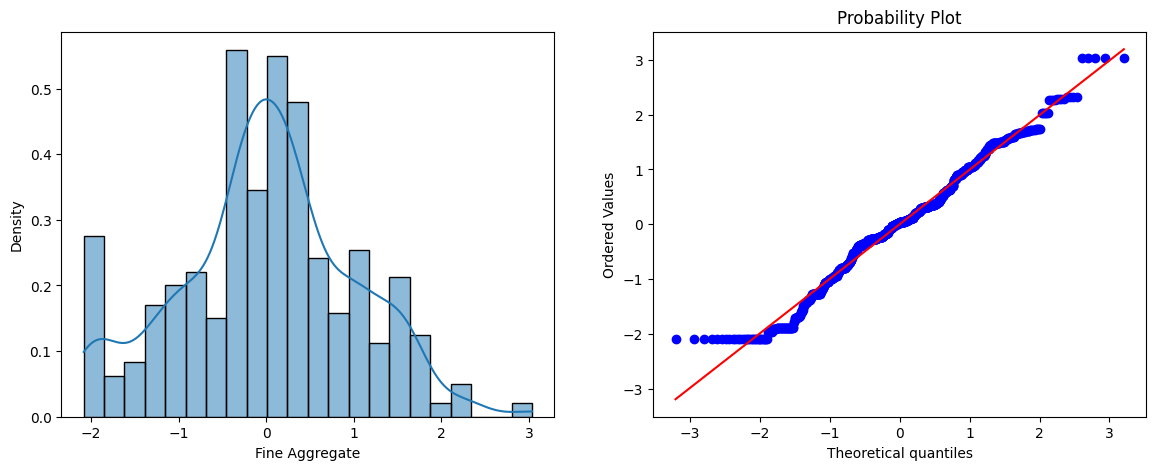

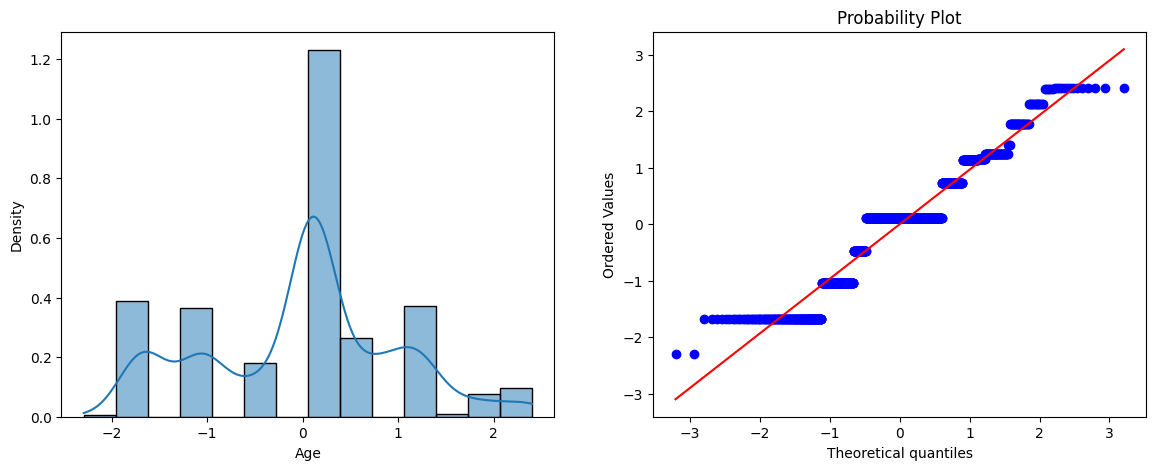

In [34]:
for col in x_transformed.columns : 
    fig ,(ax0 , ax9) = plt.subplots(1,2,figsize = (14,5))
    sns.histplot(x_transformed[col] , stat = 'density' , kde = True , ax = ax0)

    stats.probplot(x_transformed[col] , dist = 'norm' , plot = ax9)